### Bank Marketing 데이터의 분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')
df.shape

(45211, 17)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df_hot = pd.get_dummies(df)

In [13]:
df_hot.shape, df_hot.head(1)

((45211, 53),
    age  balance  day  duration  campaign  pdays  previous  job_admin.  \
 0   58     2143    5       261         1     -1         0           0   
 
    job_blue-collar  job_entrepreneur  ...  month_may  month_nov  month_oct  \
 0                0                 0  ...          1          0          0   
 
    month_sep  poutcome_failure  poutcome_other  poutcome_success  \
 0          0                 0               0                 0   
 
    poutcome_unknown  y_no  y_yes  
 0                 1     1      0  
 
 [1 rows x 53 columns])

In [17]:
X = df_hot.iloc[:, :-2]
y = df_hot.iloc[:, -1]
X.shape, y.shape

((45211, 51), (45211,))

In [93]:
# duration 은 실제 콜이 일어나지 않는 경우 무조건 0이다. 즉, 콜 이후에 생성되는 값이므로 예측에서는 사용할 수 없다.
X = X.drop(columns='duration')

In [94]:
(df['y']=='yes').mean()

0.11698480458295547

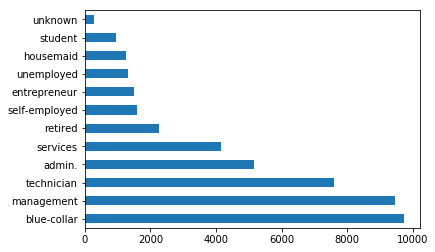

In [95]:
df['job'].value_counts().plot.barh()

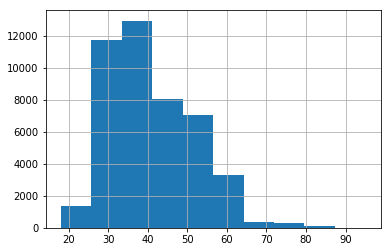

In [96]:
df['age'].hist()

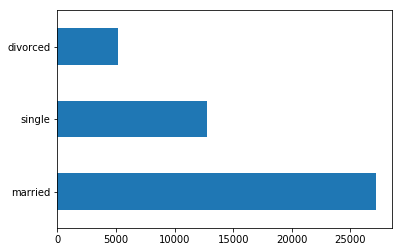

In [97]:
df['marital'].value_counts().plot.barh()

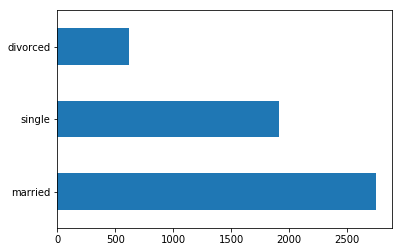

In [98]:
df['marital'][df['y']=='yes'].value_counts().plot.barh()

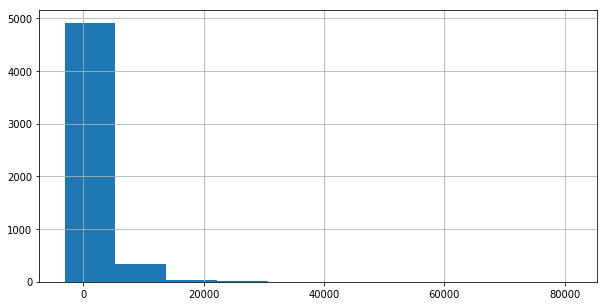

In [99]:
df['balance'][df.y=='yes'].hist(figsize=(10, 5))

In [100]:
df['balance'][df.y=='yes'].max()

81204

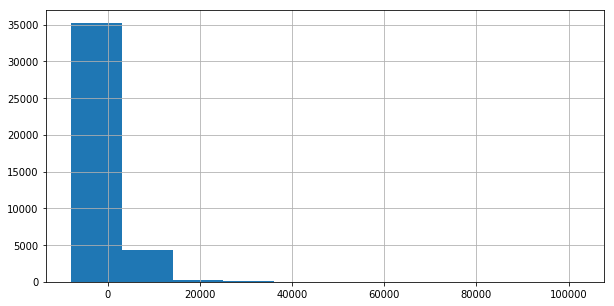

In [101]:
df['balance'][df.y=='no'].hist(figsize=(10, 5))

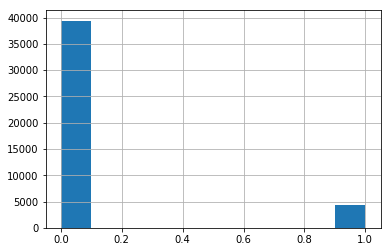

In [124]:
y[X['poutcome_success']==0].hist()

### 분류

In [102]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
import mglearn

In [103]:
# 성분 분석
pca = PCA(n_components=2).fit(X)
pca_x = pca.transform(X)
pca_x.shape

(45211, 2)

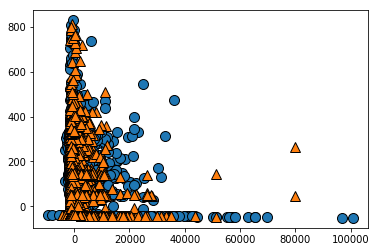

In [104]:
mglearn.discrete_scatter(pca_x[:, 0], pca_x[:, 1], df['y'])
plt.show()

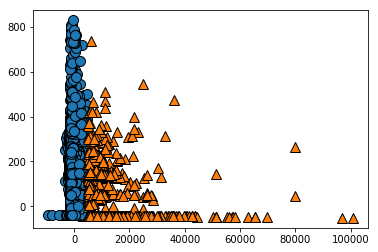

In [105]:
# KMeans Clustering
km = KMeans(n_clusters=2).fit(pca_x)
p = km.predict(pca_x)

mglearn.discrete_scatter(pca_x[:, 0], pca_x[:, 1], p)
plt.show()

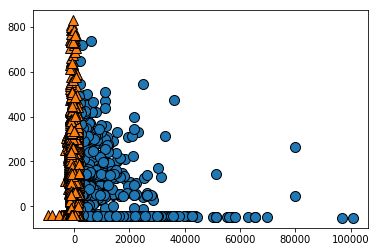

In [106]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
p = agg.fit_predict(pca_x)

mglearn.discrete_scatter(pca_x[:, 0], pca_x[:, 1], p)
plt.show()

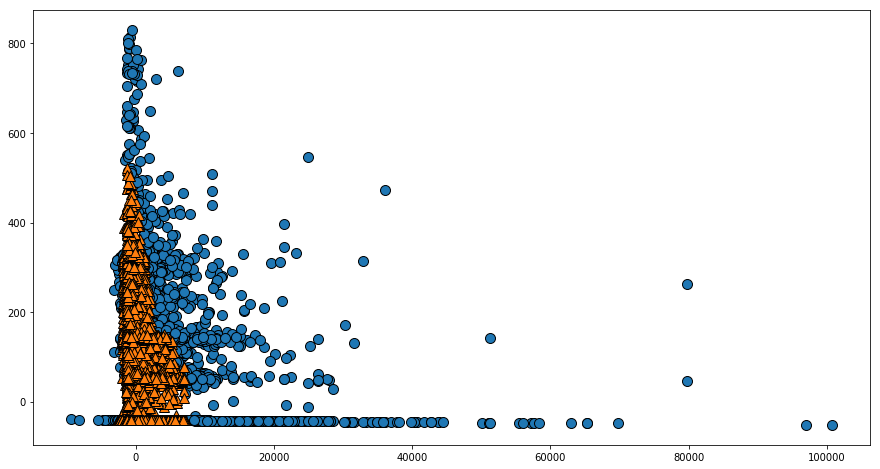

In [108]:
# DBSCAN
p = DBSCAN(eps=100, min_samples=50).fit_predict(pca_x)
plt.figure(figsize=(15, 8))
mglearn.discrete_scatter(pca_x[:, 0], pca_x[:, 1], p)
plt.show()

### 결정 트리

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [155]:
dt = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.8954524006134246, 0.8933026630098204)

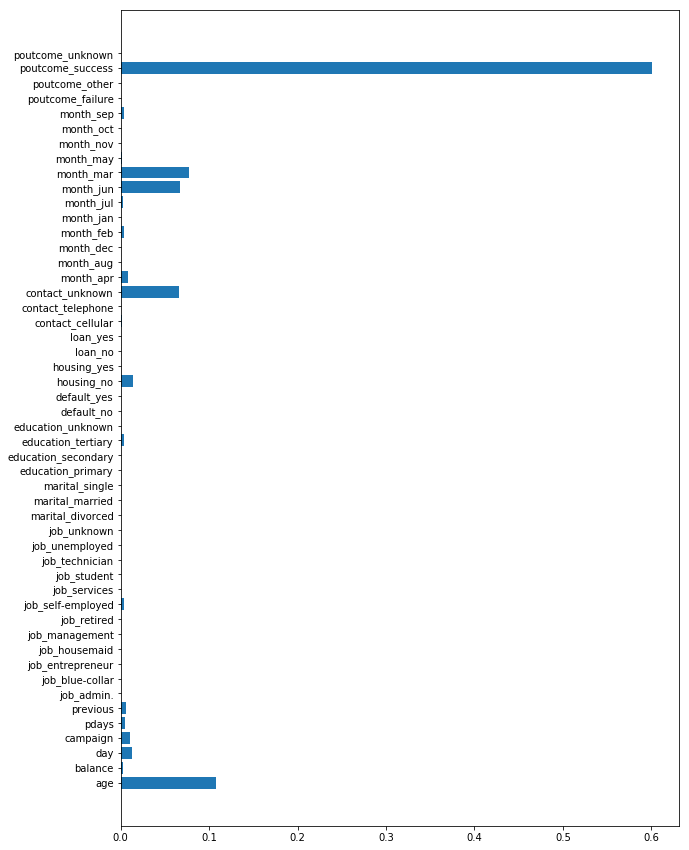

In [156]:
plt.figure(figsize=(10, 15))
plt.barh(X_train.columns, dt.feature_importances_)
plt.show()

In [157]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.tree import export_graphviz
import graphviz  # anaconda prompt 에서 pip install graphviz 해야 함

export_graphviz(dt, out_file='tree.dot', class_names=['Yes', 'No'], feature_names=X_train.columns,
                impurity=False, filled=True)

In [158]:
with open('tree.dot') as f:
    dot_graph = f.read()
f.close()

tree_grp = graphviz.Source(dot_graph)
#display(tree_grp)

In [159]:
# Tree 를 파일로 저장해 준다. view=True 이면 파일생성 후 이미지를 화면에 새창으로 띄워준다.
tree_grp.render(filename='BankMarketing', view=True, format='png')

'BankMarketing.png'

In [134]:
importance = pd.DataFrame(dt.feature_importances_, X.columns)

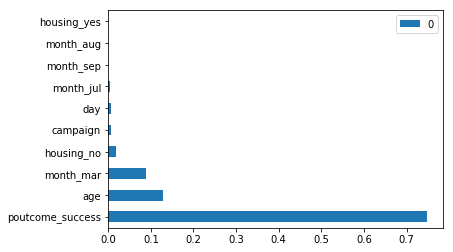

In [146]:
importance.sort_values(by=0, ascending=False).head(10).plot.barh()
plt.show()